<a href="https://colab.research.google.com/github/slvDev/Malaria-Detection-CNN-Keras/blob/master/Malaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import os
import cv2
import zipfile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from random import randrange

In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

In [0]:
zip_ref_train = zipfile.ZipFile('/content/drive/My Drive/cell-images-for-detecting-malaria.zip', 'r')
zip_ref_train.extractall('/content')
zip_ref_train.close()

In [7]:
ROOT_DATA_DIR = '/content/cell_images'
INF_DIR = os.path.join(ROOT_DATA_DIR, 'Parasitized')
UNINF_DIR = os.path.join(ROOT_DATA_DIR, 'Uninfected')

inf_fnames = os.listdir(INF_DIR)
uninf_fnames = os.listdir(UNINF_DIR)

print(f'Amount of parasitized images: {len(inf_fnames)}')
print(f'Amount of uninfected images: {len(uninf_fnames)}')
print(f'Total Images: {len(inf_fnames) + len(uninf_fnames)}')

Amount of parasitized images: 13780
Amount of uninfected images: 13780
Total Images: 27560


In [0]:
def split_data(sourse, valid, test, split_size):
    total_length = os.listdir(sourse)

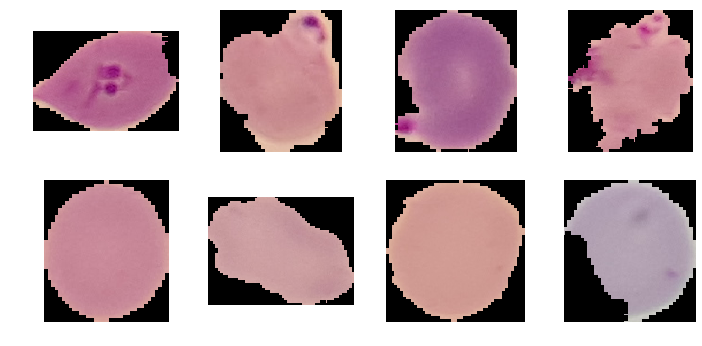

In [0]:
nrows, ncols = 4, 4
fig_size = 3 

fig = plt.gcf()
fig.set_size_inches(ncols * fig_size, nrows * fig_size)

inf_pic_paths = [os.path.join(INF_DIR, inf_fnames[randrange(len(inf_fnames))]) 
                for _ in range(4) 
                ]

uninf_pic_paths = [os.path.join(UNINF_DIR, uninf_fnames[randrange(len(uninf_fnames))]) 
                for _ in range(4) 
                ]

for i, img_path in enumerate(inf_pic_paths + uninf_pic_paths):  
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

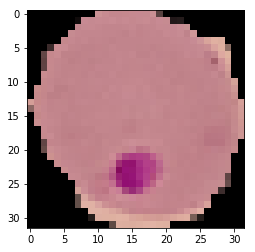

In [0]:
img_size = 32
dim = img_size, img_size

img_path = os.path.join(INF_DIR, inf_fnames[1])
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, dim)

plt.imshow(img)
plt.show()

In [0]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        vertical_flip=True,
        horizontal_flip=True,
        validation_split=0.2,
        )

train_generator = train_datagen.flow_from_directory(
        '/content/cell_images',  
        target_size=dim, 
        batch_size=32,
        class_mode='binary',
        subset='training',
        )

valid_generator = train_datagen.flow_from_directory(
        '/content/cell_images',  
        target_size=dim, 
        batch_size=32,
        class_mode='binary',
        subset='validation',
        )

Found 22048 images belonging to 2 classes.
Found 5510 images belonging to 2 classes.


In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Flatten(),    
    tf.keras.layers.Dropout(0.2),
       
    tf.keras.layers.Dense(128, activation='relu'),
    
    tf.keras.layers.Dense(1, activation='sigmoid')
])


model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [0]:
model.summary()

In [0]:
history = model.fit_generator(
        train_generator,
        epochs=50,
        validation_data=valid_generator,
        )

Epoch 1/50
689/689 [==============================] - 39s 56ms/step - loss: 0.3129 - acc: 0.8652 - val_loss: 0.1870 - val_acc: 0.9319
Epoch 2/50
689/689 [==============================] - 38s 55ms/step - loss: 0.1610 - acc: 0.9483 - val_loss: 0.1985 - val_acc: 0.9368
Epoch 3/50
689/689 [==============================] - 38s 55ms/step - loss: 0.1442 - acc: 0.9536 - val_loss: 0.1607 - val_acc: 0.9454
Epoch 4/50
689/689 [==============================] - 38s 55ms/step - loss: 0.1368 - acc: 0.9554 - val_loss: 0.3375 - val_acc: 0.8624
Epoch 5/50
689/689 [==============================] - 37s 54ms/step - loss: 0.1317 - acc: 0.9567 - val_loss: 0.1629 - val_acc: 0.9456
Epoch 6/50
689/689 [==============================] - 37s 53ms/step - loss: 0.1273 - acc: 0.9576 - val_loss: 0.1439 - val_acc: 0.9503
Epoch 7/50
689/689 [==============================] - 37s 54ms/step - loss: 0.1229 - acc: 0.9582 - val_loss: 0.1500 - val_acc: 0.9450
Epoch 8/50
689/689 [==============================] - 36s 53ms

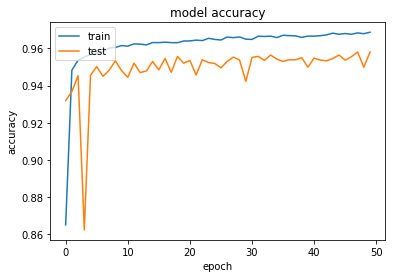

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

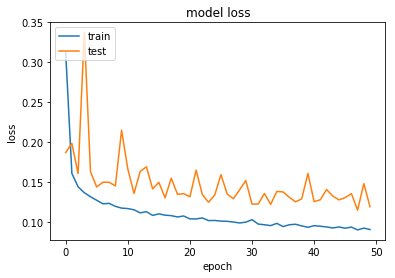

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()